## Problem Statement - 
* To classify whether the bean belongs to class Dermason or Sira using SVM

1) Locate the two types of beans that are most popular according to the data. (More 
popular == more likes on Instagram)
2) Then, make a classifier that can classify between these two types well. He thinks 
SVM is a good technique, and suggests you use it. (Cool name, he thinks. That’s why 
he’s asking you to use it. It’s all for the ‘gram.)
3) He just does not want good classification, he wants you to show that to him as well, 
through some colorful and suave visualizations of how well the model performed 
and all that. (How else do you think he’s gonna get all those likes?)
___

### Dataset: _Dry Beans_ 
* This dataset contains features of coffee beans such as form, shape, type, and structure.
___

### *Attribute information:*

1.) Area (A): The area of a bean zone and the number of pixels within its boundaries.

2.) Perimeter (P): Bean circumference is defined as the length of its border.

3.) Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.

4.) Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.

5.) Aspect ratio (K): Defines the relationship between L and l.

6.) Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.

7.) Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.

8.) Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.

9.) Extent (Ex): The ratio of the pixels in the bounding box to the bean area.

10.)Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.

11.)Roundness (R): Calculated with the following formula: (4piA)/(P^2)

12.)Compactness (CO): Measures the roundness of an object: Ed/L

13.)ShapeFactor1 (SF1)

14.)ShapeFactor2 (SF2)

15.)ShapeFactor3 (SF3)

16.)ShapeFactor4 (SF4)

17.)Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)
___

### Loading the required libraries

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

from scipy import stats

import seaborn as sns                    
import matplotlib.pyplot as plt           
%matplotlib inline

import plotly.express as px

In [2]:
# code to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
os.chdir("D://vu//terms//term 9//Methods and Algorithm in ML- 2//Midterm")

In [4]:
#Reading the dataset
train_data= pd.read_excel("Dry_Bean_Dataset.xlsx")

___

### EDA

In [5]:
train_data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


##### Check for null values

In [6]:
train_data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

**The dataset has no null values.**

##### Check the shape of the dataset

In [7]:
train_data.shape

(13611, 17)

##### Check the datatype of each attribute

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

##### Check statistics of numerical columns

In [9]:
train_data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


#### **Dropping data to convert it into a binary class classsification problem**

Text(0.5, 1.0, "Distributioin of Target variable 'Class'")

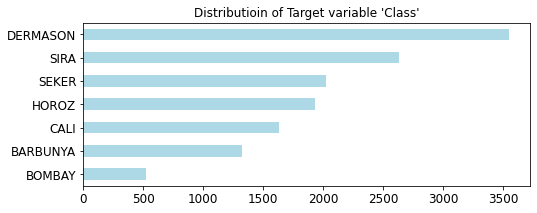

In [10]:
plt.figure(figsize=(8,3))
train_data['Class'].value_counts().sort_values().plot(kind='barh',color="lightblue", fontsize=12)
plt.title("Distributioin of Target variable 'Class'")

* The classes with the maximum data are Dermason and Sira.
* Therefore, keeping those two and dropping all the other classes.

In [11]:
df = train_data.copy()
df.drop(df[(df['Class'] != "DERMASON") &(df['Class'] != "SIRA") ].index, inplace=True)

In [12]:
df.Class.value_counts(normalize=True)*100

DERMASON    57.360078
SIRA        42.639922
Name: Class, dtype: float64

* The data has 57% of class Dermason values and 43% Sira values

<AxesSubplot:>

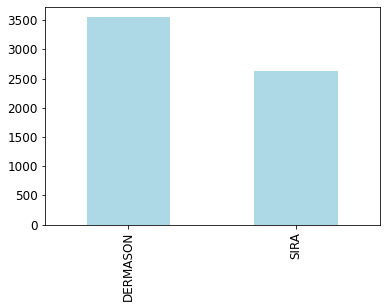

In [13]:
df.Class.value_counts().plot(kind = 'bar',color="lightblue", fontsize=12)

In [14]:
#Checking the dimensions after dropping the data
df.shape

(6182, 17)

##### Corrplot to check correlations between attributes

<AxesSubplot:>

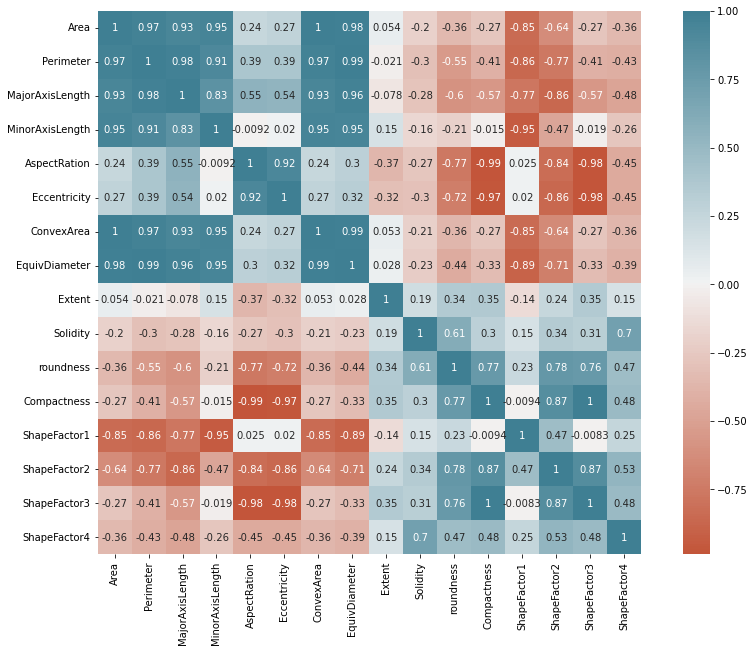

In [15]:
corr = df.drop(['Class'], axis=1).corr()
plt.figure(figsize=(15, 10))
sns.heatmap(train_data.corr(), annot=True, square=True, cmap=sns.diverging_palette(20, 220, n=200))

* Many attributes are highly correlated, which could result in very high multicollinearity 

___

## Visualizations

In [16]:
# Function to make histograms
def histogram_boxplot(feature, figsize=(10,5)):
    
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2,
                                           sharex = True, 
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) 
    
    sns.boxplot(x=feature, ax=ax_box2, showmeans=True, color='violet')
    sns.histplot(x=feature, kde=False, ax=ax_hist2, palette="winter")
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') 
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') 

In [17]:
# Function to make boxplots
def box_plt(feature, variable):
    plt.figure(figsize=(15,6)) 
    
    sns.boxplot(feature, x='Class', y=variable, data=df, palette='coolwarm', showmeans=True,
           meanprops={"marker":"^",
                    "markerfacecolor":"white",
                    "markeredgecolor":"black",
                    "markersize":"8"});

#### **Checking overall behaviour of attributes through visualizations**

In [18]:
features = df.drop(['Class'], axis=1).columns
features

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')

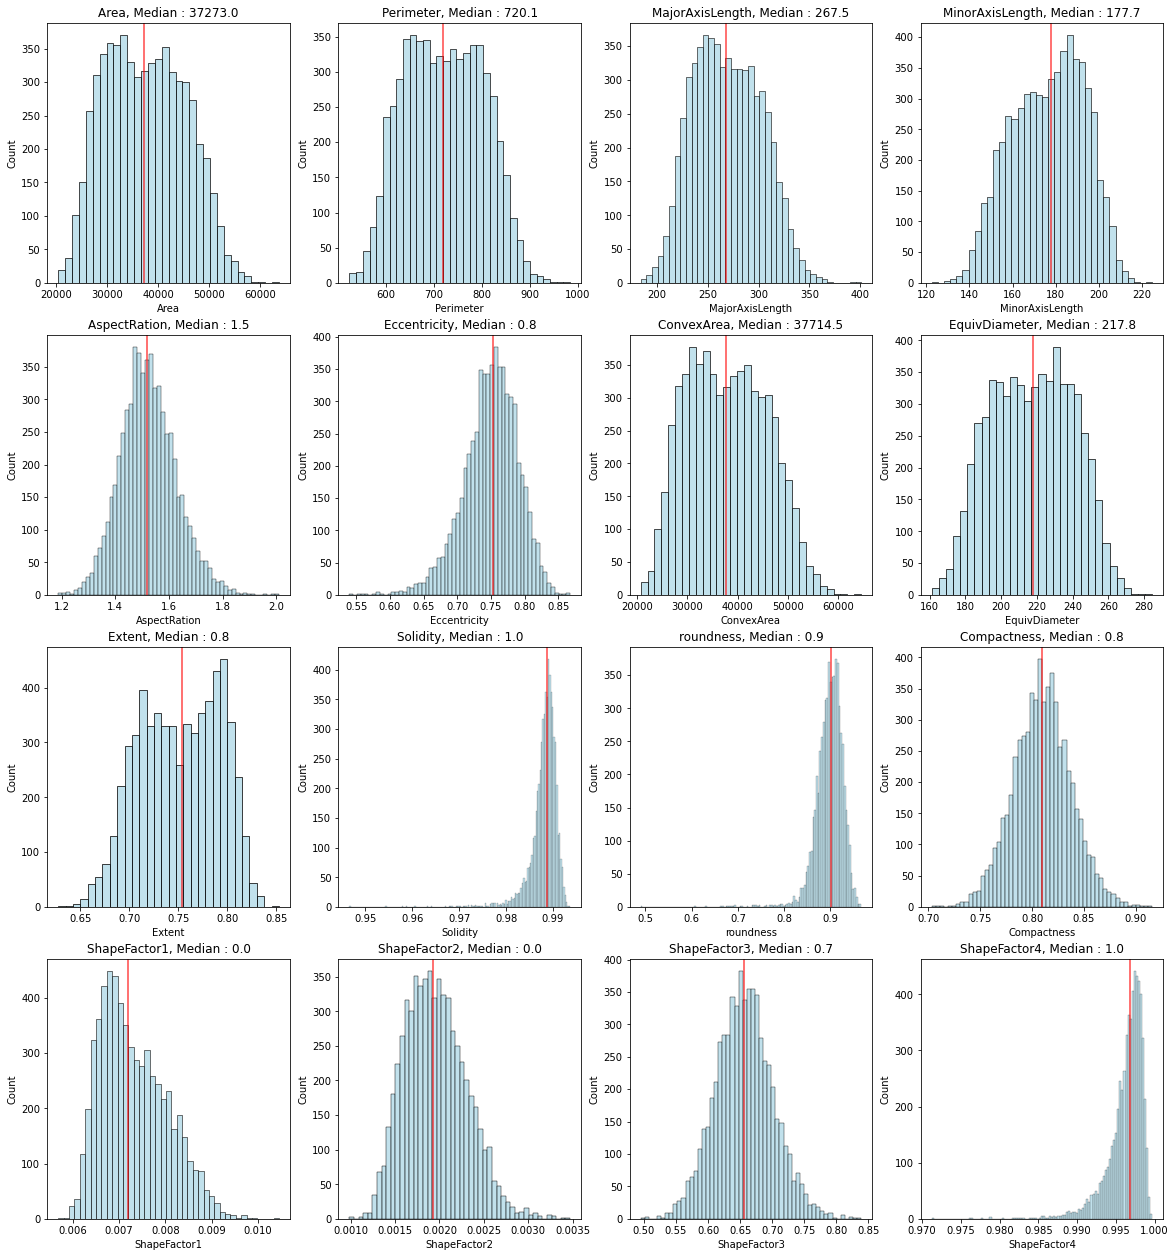

In [19]:
fig, axes = plt.subplots(4, 4, figsize=(20, 22))
for i, axe in enumerate(axes.flatten()):
    sns.histplot(df[features[i]], ax = axe, color='lightblue')
    median = df[features[i]].median()
    axe.set_title(features[i] + f', Median : {median:0.1f}')
    axe.axvline(median, color ='red', lw=2, alpha = 0.55)

* Attributes like Eccentricity, roundness, Solidity, ShapeFactor4 are highly right skewed 
* The outliers present may be having this effect on the attributes.

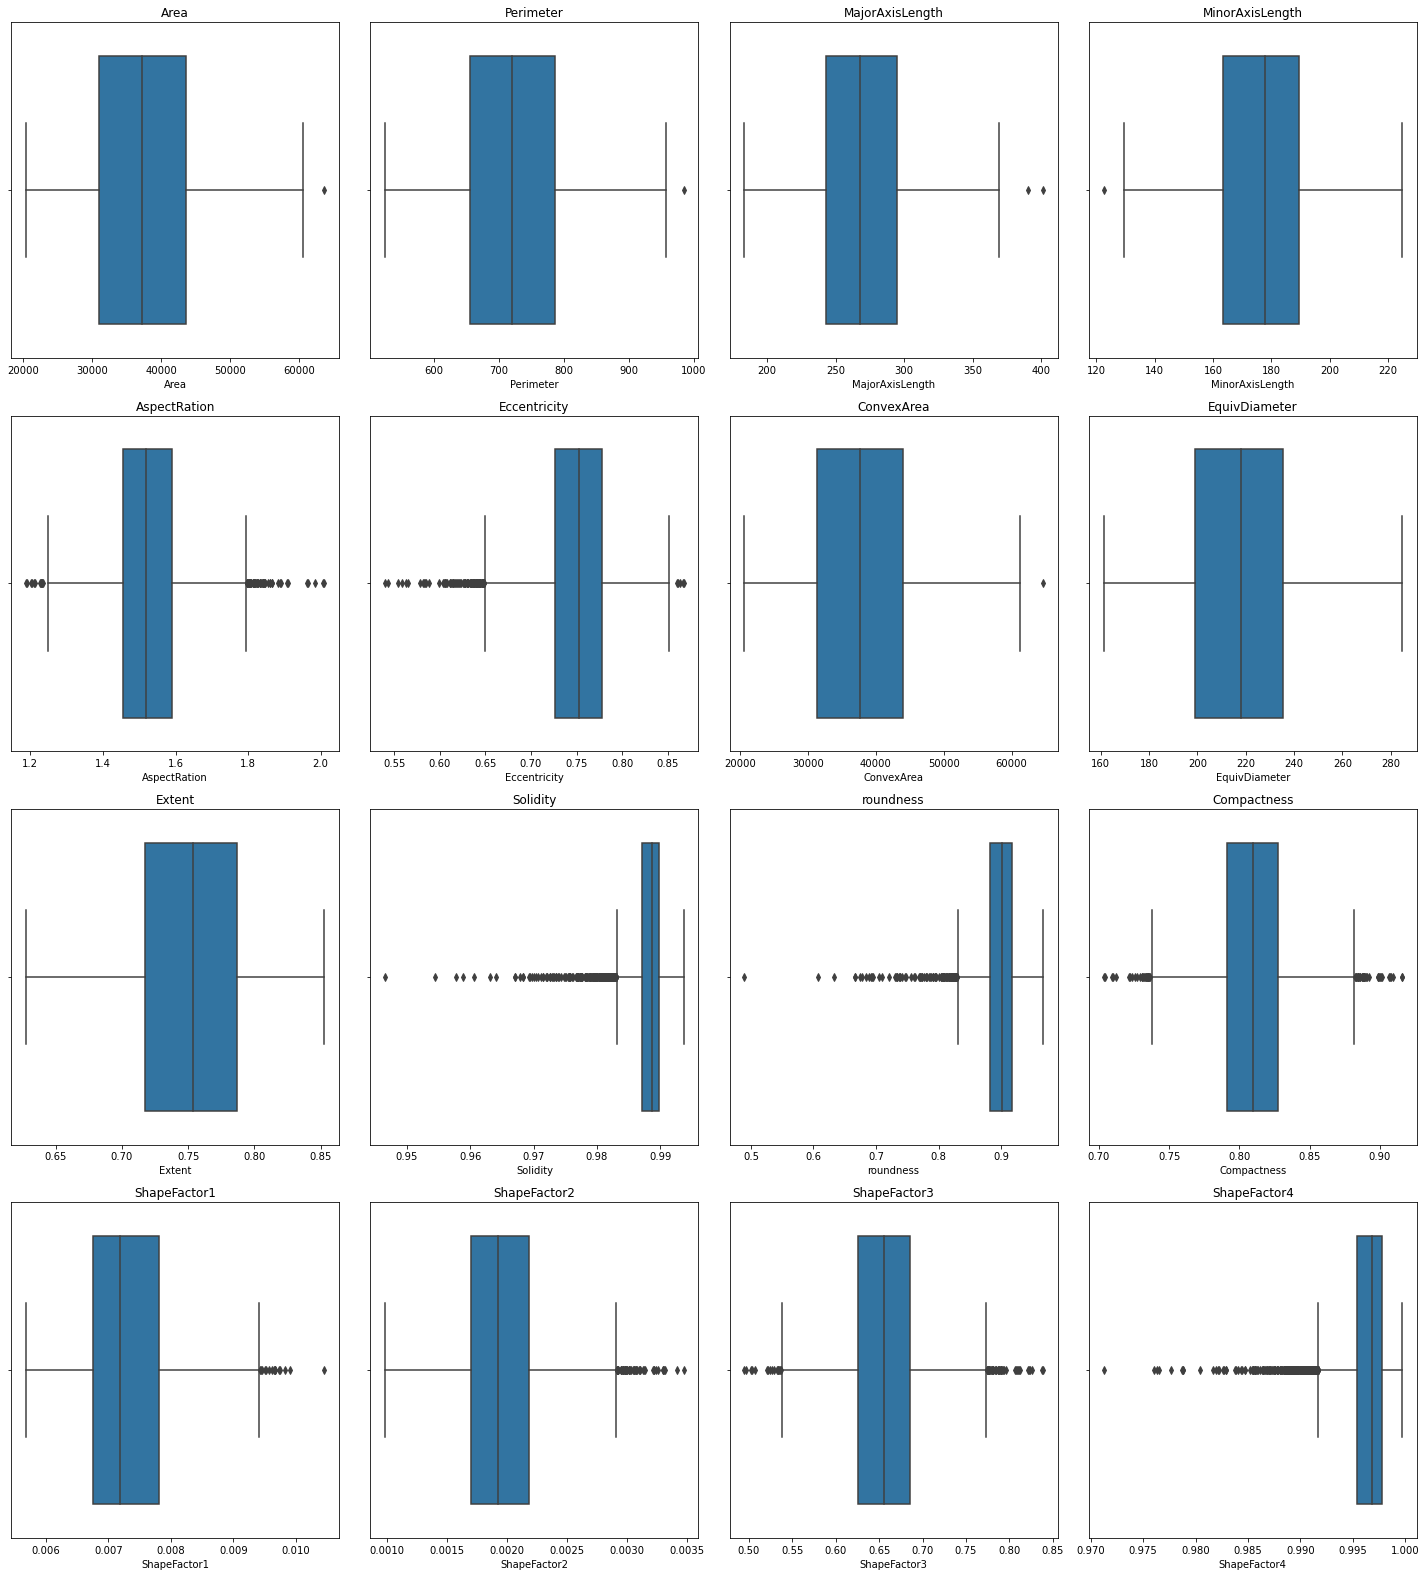

In [20]:
fig, axes = plt.subplots(4, 4, figsize=(20, 22))
for i, axe in enumerate(axes.flatten()):
    sns.boxplot(df[features[i]], ax= axe)
    axe.set_title(features[i])
    
plt.tight_layout()
plt.show()

* Most of the attributes having a smaller range have many outliers

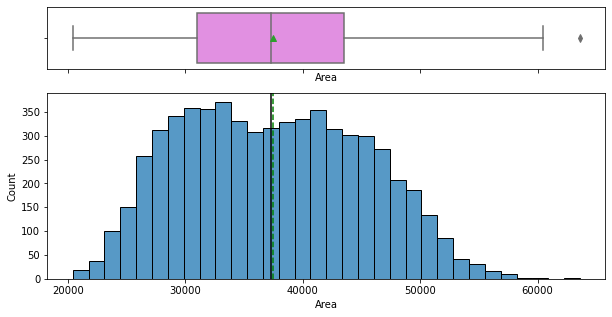

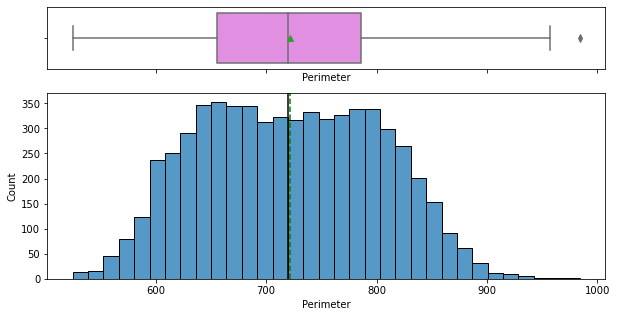

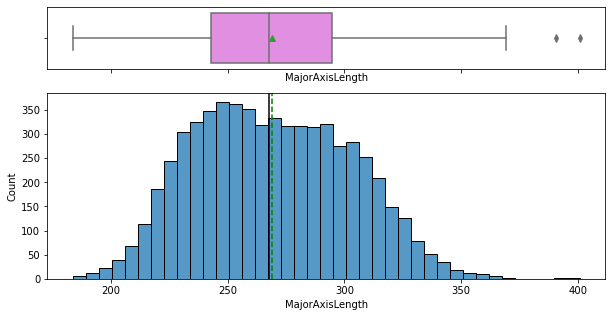

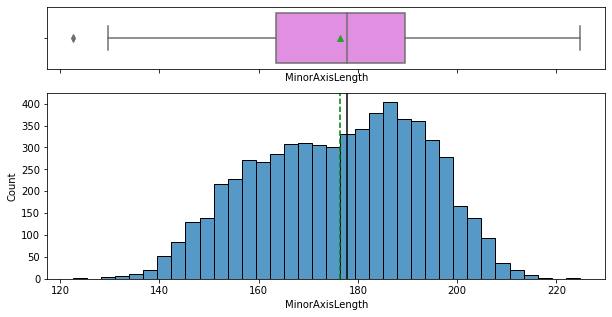

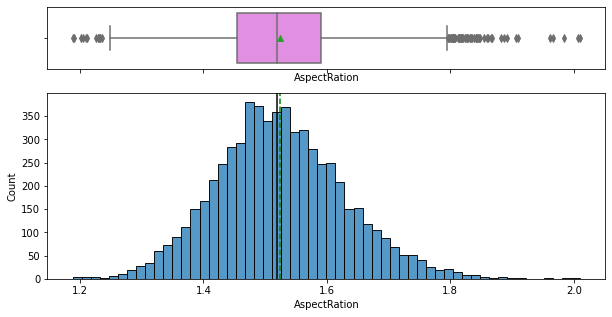

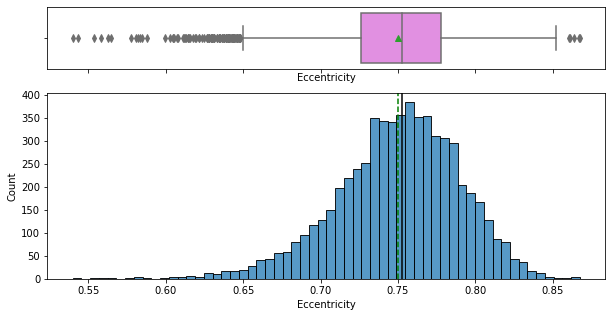

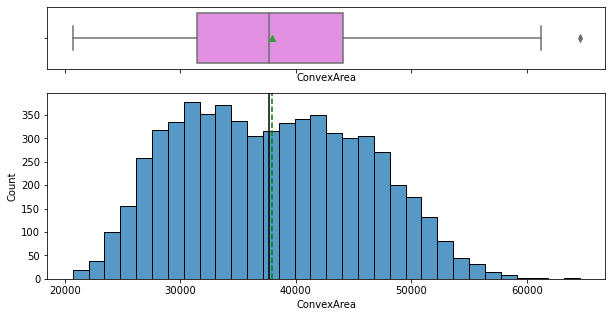

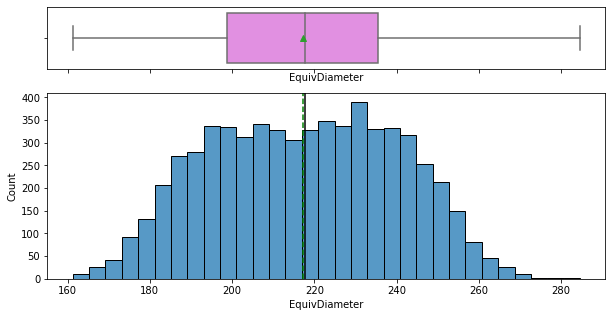

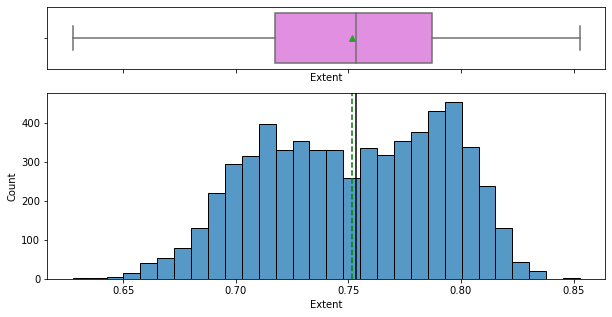

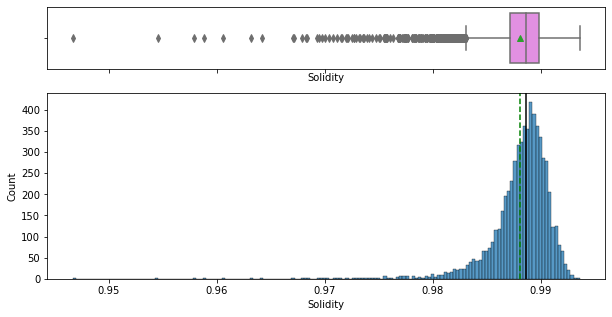

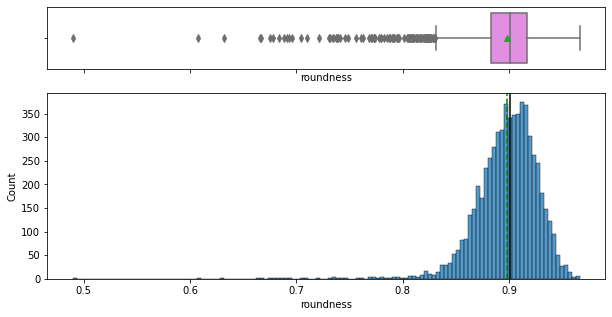

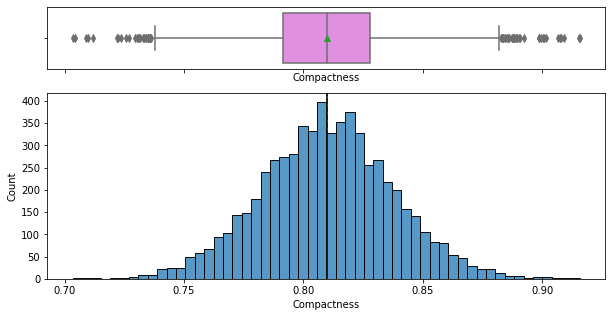

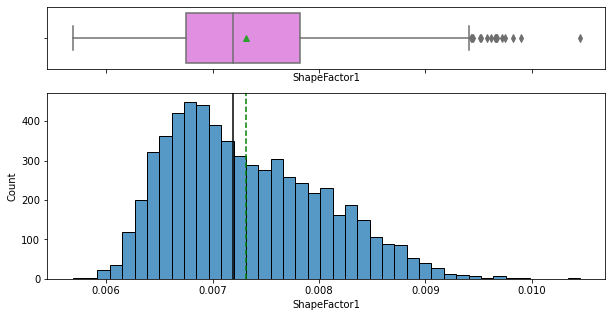

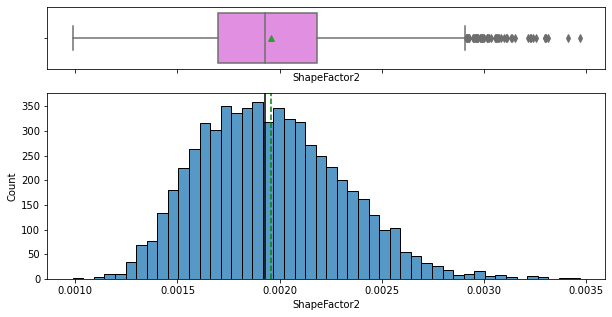

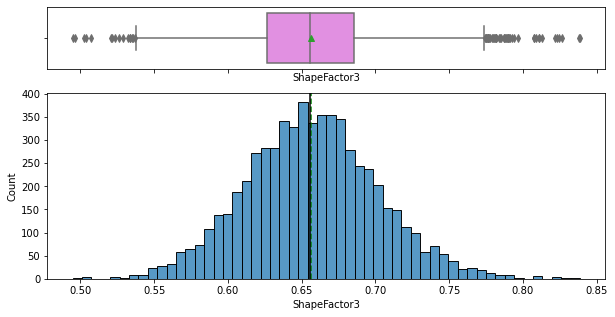

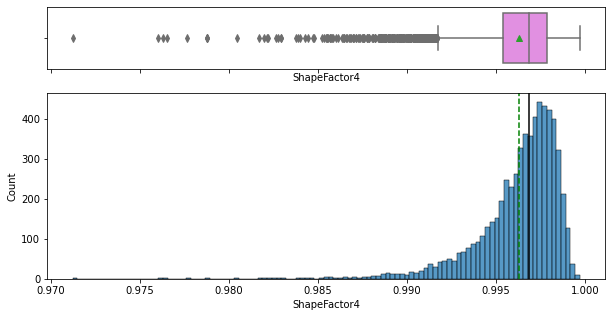

In [21]:
for col in features:
    histogram_boxplot(df[col])

* Most of the features are almost normally distributed, having mean ~ median.

* Except Solidity, roundness and ShapeFactor4 which are left skewed, because mean is less than median.
* Solidity is left skewed, with a lot of max outliers, for values <0.8.
* Roundness is left skewed, with a lot of max outliers, for values <0.98.
* ShapeFactor4 is left skewed, with a lot of max outliers, for values <0.99.

___

### Train-test split

In [22]:
X = df.drop(['Class'], axis=1)
y = df.Class

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### Scaling the data

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# scale on train
X_train_sacled= scaler.fit_transform(X_train)

X_val_scaled= scaler.fit_transform(X_val)


* scaling the data to make the attributes zero-mean and unit variance.

## PCA

[0.57 0.22 0.11 0.06 0.03 0.01 0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.  ]


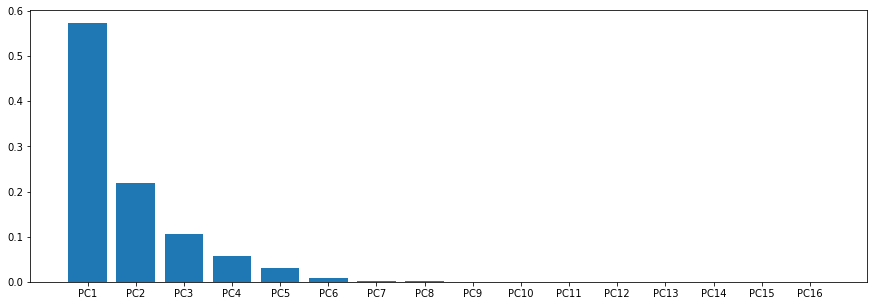

In [26]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train_sacled)
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC" + str(i) for i in list(range(1, num_pc + 1))]
f, ax = plt.subplots(figsize=(15,5))
plt.bar(x=pc_list, height=pca.explained_variance_ratio_)

np.set_printoptions(precision=2, suppress=True)
print((pca.explained_variance_ratio_))

* Taking 3 components to build the model as they explain 91% of the data

* Using PCA for dimensionality reduction (making the model simpler) and to effictively handle multicollinearity (by highly correlated variables into a set of uncorrelated variable).

### SVC Classifier Model

In [27]:
pca = PCA(n_components=3)

X_train_pca = pca.fit_transform(X_train_sacled)
X_val_pca = pca.transform(X_val_scaled)

# SVM- linear classifier model
from sklearn.svm import SVC
model1 = SVC(kernel='linear')

# Fitting the model
model1.fit(X_train_pca, y_train)

# Predicting 
pred_pca = model1.predict(X_train_pca)
y_predict_val2 = model1.predict(X_val_pca)

In [28]:
# Confusion Matrix
pd.DataFrame(confusion_matrix(y_val, y_predict_val2), columns=['Predicted Dermason','Predicted Sira'], index=['Actual Dermason','Actual Sira'])

,Predicted Dermason,Predicted Sira
Actual Dermason,988,76
Actual Sira,81,710


In [29]:
### Train data accuracy
print("\nTRAIN DATA ACCURACY",accuracy_score(y_train,pred_pca))
print("\nTrain data f1-score for class 'DERMASON'",f1_score(y_train,pred_pca,pos_label="DERMASON"))
print("\nTrain data f1-score for class 'SIRA'",f1_score(y_val,y_predict_val2,pos_label="SIRA"))

print("\n\n")

# Classification report
print(classification_report(y_val, y_predict_val2))

print("\n")

### Validation data accuracy
print("VAL DATA ACCURACY",accuracy_score(y_val,y_predict_val2))
print("\nVAL data f1-score for class 'DERMASON'",f1_score(y_val,y_predict_val2,pos_label="DERMASON"))
print("\nVAL data f1-score for class 'SIRA'",f1_score(y_val,y_predict_val2,pos_label="SIRA"))


TRAIN DATA ACCURACY 0.9198058701178645

Train data f1-score for class 'DERMASON' 0.9304190896330459

Train data f1-score for class 'SIRA' 0.9004438807863031



              precision    recall  f1-score   support

    DERMASON       0.92      0.93      0.93      1064
        SIRA       0.90      0.90      0.90       791

    accuracy                           0.92      1855
   macro avg       0.91      0.91      0.91      1855
weighted avg       0.92      0.92      0.92      1855



VAL DATA ACCURACY 0.9153638814016173

VAL data f1-score for class 'DERMASON' 0.9263947491795594

VAL data f1-score for class 'SIRA' 0.9004438807863031


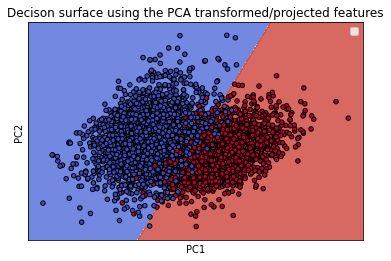

In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
le = LabelEncoder()
y_train1 = pd.DataFrame(y_train)
y_train1.Class = le.fit_transform(y_train1.Class)
y_train1 = y_train1.to_numpy()
X = X_train_sacled
y = y_train1

pca = PCA(n_components=2)
Xreduced = pca.fit_transform(X)

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = svm.SVC(kernel='linear')
clf = model.fit(Xreduced, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = Xreduced[:, 0], Xreduced[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Decison surface using the PCA transformed/projected features')
ax.legend("")
plt.show()

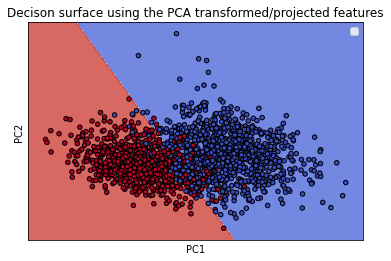

In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
le = LabelEncoder()
y_test1 = pd.DataFrame(y_val)
y_test1.Class = le.fit_transform(y_test1.Class)
y_test1 = y_test1.to_numpy()
X = X_val_scaled
y = y_test1

pca = PCA(n_components=2)
Xreduced = pca.fit_transform(X)

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = svm.SVC(kernel='linear')
clf = model.fit(Xreduced, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = Xreduced[:, 0], Xreduced[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Decison surface using the PCA transformed/projected features')
ax.legend("")
plt.show()

* The above plots approximately show how SVM is classifying the two classes "DERMASON" and "SIRA" using the support vector linear classifier, an extension of the machine learining techinque SVM.

* The overlapping blue and red points crosssing the boundaries are the ones that are misclassified, the further they are away from the boundary of the class they belong to the more they are penalized. 

* In technical jargon, the data points or vectors that are the closest to the hyperplane and which affect the position of the hyperplane are termed as Support Vector. Since these vectors support the hyperplane, hence called a Support vector.

___